# Customer Demographic

In [1]:
# Importing the liberaries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Lets import the necessary file and view 
dataset = pd.read_excel(r"C:\Users\******\Desktop\KPMG\KPMG_VI_New_raw_data_update_final.xlsx",header=None, sheet_name='CustomerDemographic')
dataset.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,Note: The data and information in this documen...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
2,1,Laraine,Medendorp,F,93,1953-10-12 00:00:00,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11
3,2,Eli,Bockman,Male,81,1980-12-16 00:00:00,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16
4,3,Arlin,Dearle,Male,61,1954-01-20 00:00:00,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15


In [3]:
# Due to improper header will drop the header
dataset=dataset.drop(0)
# Make the zero row as a header
header_row = 0
dataset.columns = dataset.iloc[header_row]
# Lets drop the zero row
dataset = dataset.drop(dataset.index[0])
# Lets reset the index
dataset = dataset.reset_index(drop=True)
# View the data looks fine
dataset.head(5)

1,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12 00:00:00,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11
1,2,Eli,Bockman,Male,81,1980-12-16 00:00:00,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16
2,3,Arlin,Dearle,Male,61,1954-01-20 00:00:00,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15
3,4,Talbot,NaN,Male,33,1961-10-03 00:00:00,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13 00:00:00,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8


In [4]:
# Lets check the table 
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
customer_id                            4000 non-null object
first_name                             4000 non-null object
last_name                              3875 non-null object
gender                                 4000 non-null object
past_3_years_bike_related_purchases    4000 non-null object
DOB                                    3913 non-null object
job_title                              3494 non-null object
job_industry_category                  3344 non-null object
wealth_segment                         4000 non-null object
deceased_indicator                     4000 non-null object
default                                3698 non-null object
owns_car                               4000 non-null object
tenure                                 3913 non-null object
dtypes: object(13)
memory usage: 406.3+ KB


In [5]:
# Checking the number of unique, count and frequency
dataset.describe()

1,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
count,4000,4000,3875,4000,4000,3913,3494,3344,4000,4000,3698,4000,3913
unique,4000,3139,3725,6,100,3448,195,9,3,2,90,2,22
top,4000,Timmie,Ramsdell,Female,16,1978-01-30 00:00:00,Business Systems Development Analyst,Manufacturing,Mass Customer,N,100,Yes,7
freq,1,5,3,2037,56,7,45,799,2000,3998,113,2024,235


In [6]:
# Lets check for null values in each column
dataset.isnull().sum()

1
customer_id                              0
first_name                               0
last_name                              125
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                              506
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
default                                302
owns_car                                 0
tenure                                  87
dtype: int64

In [7]:
# So many unique values in gender column, lets see and fix it
dataset['gender'].value_counts()

Female    2037
Male      1872
U           88
M            1
Femal        1
F            1
Name: gender, dtype: int64

In [8]:
# Column 'gender' shows the in consistency has the inconsistancy issue 
dataset['gender'] = dataset['gender'].replace(['Femal','F','M'],['Female','Female','Male'])

In [9]:
# After fixing it looks fine
dataset['gender'].value_counts()

Female    2039
Male      1873
U           88
Name: gender, dtype: int64

In [11]:
# convert DOB to pandas datetime format
dataset['Age'] = pd.to_datetime(dataset.DOB)
dataset['Age'].head(5)

0   1953-10-12
1   1980-12-16
2   1954-01-20
3   1961-10-03
4   1977-05-13
Name: Age, dtype: datetime64[ns]

In [12]:
# Since the table has no Age column, lets create the age column 
import datetime
def from_dob_to_age(born):
    today = datetime.date.today()
    return today.year - born.year - ((today.month, today.day) < (born.month, born.day))
dataset['Age'] = dataset['Age'].apply(lambda x: from_dob_to_age(x))
dataset['Age'].head(5)

0    67.0
1    40.0
2    67.0
3    59.0
4    43.0
Name: Age, dtype: float64

In [13]:
# Lets find the hightest aged person 
dataset.nlargest(5, ['Age']) 

1,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure,Age
33,34,Jephthah,Bachmann,U,59,1843-12-21,Legal Assistant,IT,Affluent Customer,N,NaN,No,20,177.0
719,720,Darrel,Canet,Male,67,1931-10-23 00:00:00,Recruiting Manager,Retail,Affluent Customer,N,1;DROP TABLE users,No,6,89.0
1091,1092,Katlin,Creddon,Female,56,1935-08-22 00:00:00,VP Quality Control,Retail,Mass Customer,N,ì¬íê³¼íì ì´íì°êµ¬ì,No,5,85.0
3409,3410,Merrili,Brittin,Female,93,1940-09-22 00:00:00,NaN,Property,Mass Customer,N,á,No,16,80.0
657,658,Donn,Bonnell,Male,38,1944-01-24 00:00:00,Tax Accountant,Manufacturing,Affluent Customer,N,ì¬íê³¼íì ì´íì°êµ¬ì,Yes,8,77.0


In [15]:
# From the table above we can find the age which is not normal has a Accuracy issue and remove 
dataset = dataset[dataset['Age'] <= 100]

In [16]:
# The default column has no proper informaton, let drop and raise the Relevancy issue
dataset = dataset.drop(['default'], axis = 1)

In [17]:
# Lets check with the Deceased indication 
dataset['deceased_indicator'].value_counts()

N    3910
Y       2
Name: deceased_indicator, dtype: int64

In [18]:
# Since we found the deceased indication we no longer required their information and raise the Currancy issue
dataset = dataset[dataset['deceased_indicator'] != 'Y']

In [19]:
# Lets round the age column to tens for the graph
dataset['Age_round'] = dataset['Age'].round(-1)
dataset['Age_round'].head(5)

0    70.0
1    40.0
2    70.0
3    60.0
4    40.0
Name: Age_round, dtype: float64

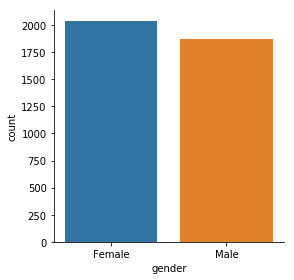

In [21]:
# Lets plot a graph based on gender, who has bought more bikes
sns.catplot('gender',kind="count",data=dataset, height=4, aspect=1)

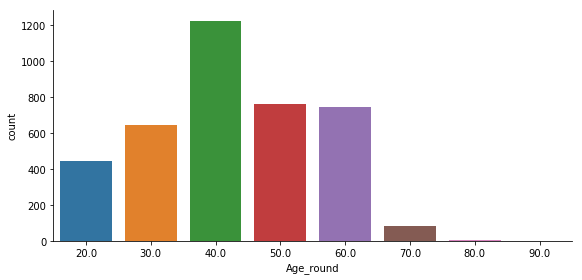

In [22]:
# lets see which age group has bought more bikes
sns.catplot('Age_round',kind="count",data=dataset, height=4, aspect=2)

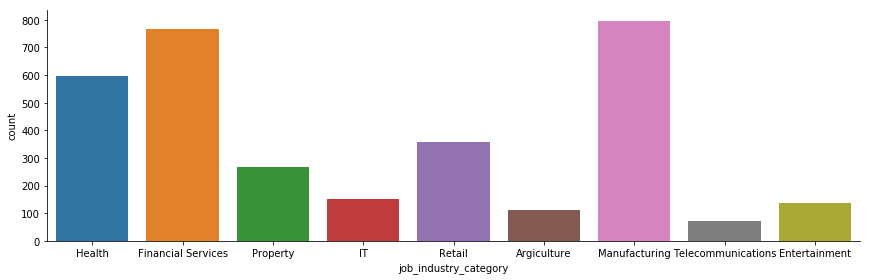

In [23]:
# Lets check job_industry_category bought more bikes
sns.catplot('job_industry_category',kind="count",data=dataset, height=4, aspect=3)

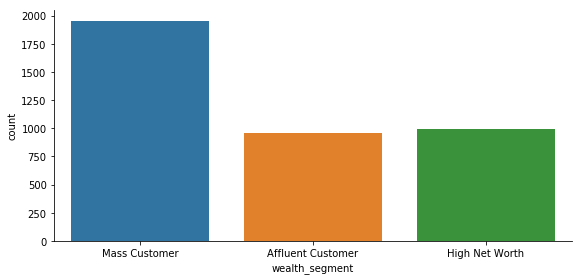

In [24]:
# With wealth segment the number of bikes sold
sns.catplot('wealth_segment',kind="count",data=dataset, height=4, aspect=2)

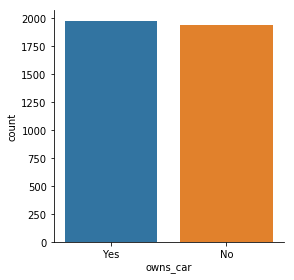

In [25]:
# Total customers owns car
sns.catplot('owns_car',kind="count",data=dataset, height=4, aspect=1)

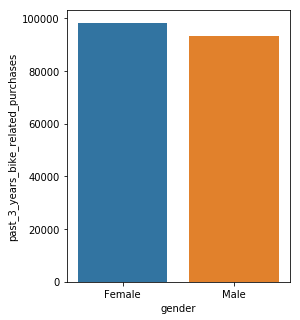

In [31]:
# Lets check past_3_years_bike_related_purchases with respect to gender
fig_dims = (4, 5)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x='gender', y='past_3_years_bike_related_purchases', ax = ax, data=dataset, ci=None, estimator=sum)

In [33]:
# Lets extract the Cleaned Data for further analysis
dataset.to_csv(r'C:\Users\******\Desktop\KPMG\Cleaned_CustomerDemographic.csv', index = False)